In [5]:
# This code just analyzes some of the hdf5 stuff and lets you poke around a bit
# Original is explain_this_file.py but decided notebooks are probably better
import h5py
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# TRY keep consistent path relations. Just put them in 4022S_data
# Relative path starts with "../4022S_data/undergrad_testset/" followed by filename
#f = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5')
f = h5py.File('../4022S_data/golfball_testset1/Experiment_2024-09-13_14-15-40_120_initialgolftest_slow.hdf5')

In [6]:
# Experimentations about starting information of the file.

print(list(f.keys()))   #h5py.File works like a python dictionary
                        #we can check the keys

sensor_dataset = f['Sensors']

# calling "sensor_dataset.shape" in terminal bounces an error because it is a group 
# in the hierarchy, not an actual dataset

print(sensor_dataset.name) # is the name of whats in sensor_dataset

['Comments', 'Sensors']
/Sensors


In [7]:
print("This is everything in here\n_______________________________________________")
def printname(name):
    print(name)
#f.visit(printname) # This will print all of the hierarcies and files in the file

display_all = input("Do you want to skip the blurb [y/N]?\n")

if display_all == "n" or display_all == "N":
    f.visit(printname)

# until this point, everything is from https://docs.h5py.org/en/stable/quick.html#quick
# looking now at https://docs.h5py.org/en/stable/high/group.html#group

This is everything in here
_______________________________________________
Comments
Comments/experiment_setup
Comments/sensor_list
Sensors
Sensors/TI_Radar
Sensors/TI_Radar/Data
Sensors/TI_Radar/Data/Frame_0
Sensors/TI_Radar/Data/Frame_0/Timestamps
Sensors/TI_Radar/Data/Frame_0/Timestamps/nano_seconds
Sensors/TI_Radar/Data/Frame_0/Timestamps/seconds
Sensors/TI_Radar/Data/Frame_0/frame_data
Sensors/TI_Radar/Data/Frame_1
Sensors/TI_Radar/Data/Frame_1/Timestamps
Sensors/TI_Radar/Data/Frame_1/Timestamps/nano_seconds
Sensors/TI_Radar/Data/Frame_1/Timestamps/seconds
Sensors/TI_Radar/Data/Frame_1/frame_data
Sensors/TI_Radar/Data/Frame_10
Sensors/TI_Radar/Data/Frame_10/Timestamps
Sensors/TI_Radar/Data/Frame_10/Timestamps/nano_seconds
Sensors/TI_Radar/Data/Frame_10/Timestamps/seconds
Sensors/TI_Radar/Data/Frame_10/frame_data
Sensors/TI_Radar/Data/Frame_2
Sensors/TI_Radar/Data/Frame_2/Timestamps
Sensors/TI_Radar/Data/Frame_2/Timestamps/nano_seconds
Sensors/TI_Radar/Data/Frame_2/Timestamps/second

In [8]:
# Messing with measurement parameters

freq_slope_const = f['Sensors/TI_Radar/Parameters/profileCfg/freqSlopeConst'][()] # In MHz per microsecond
chirp_start_index = f['Sensors/TI_Radar/Parameters/frameCfg/chirpStartIndex'][()]
chirp_end_index = f['Sensors/TI_Radar/Parameters/frameCfg/chirpEndIndex'][()]
frame_period = f['Sensors/TI_Radar/Parameters/frameCfg/framePeriod'][()]
ramp_end_time = f['Sensors/TI_Radar/Parameters/profileCfg/rampEndTime'][()]
start_freq = f['Sensors/TI_Radar/Parameters/profileCfg/startFreq'][()]
number_of_samples_per_chirp = f['Sensors/TI_Radar/Parameters/profileCfg/numAdcSamples'][()]
kilo_samples_per_second = f['Sensors/TI_Radar/Parameters/profileCfg/digOutSampleRate'][()] # in ks per second
c = 299792458 # metres per second

# Want to calculate Tsweep
# freq_slope / (chirp_end_index - chirp_start_index)

#print(number_of_samples_per_chirp)
#print(sample_rate)
Tdata = number_of_samples_per_chirp * 1/(kilo_samples_per_second*1000)
print(f'Tdata = {Tdata} seconds')
# From this we can find bandwidth with B = Tdata * frequency_slope_constant
bandwidth = Tdata * freq_slope_const * 1e6 # This leaves it in MHz
print(f'B = {bandwidth} MHz')

Tdata = 1.28e-05 seconds
B = 1024.0 MHz


In [9]:
target_frame = 'Sensors/TI_Radar/Data/Frame_5'

frame_data = f[f'{target_frame}/frame_data']
time_data = f[f'{target_frame}/Timestamps/nano_seconds']
# Sensors/TI_Radar/Data/Frame_99/Timestamps/nano_seconds
# Sensors/TI_Radar/Data/Frame_99/Timestamps/seconds

# samples x chirps x channels <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
print(frame_data.dtype)
samples = frame_data[:,0,0]
print(samples)

# Print the actual timestamp values
print(time_data[()])


complex64
[ 204.+453.j  221.+487.j  292.+279.j  -13.+147.j   74.+350.j  170.+800.j
  452.+235.j  100. -27.j -329.+652.j  246.+418.j  420.+201.j -112.+494.j
  188.+440.j  168.+486.j   47.+269.j  -60.+343.j  -42.+358.j  101.+243.j
 -108.+558.j  166.+304.j   91.+174.j -269.+463.j   91.+463.j  123.+342.j
  -33.+184.j -123.+539.j  146.+517.j   75.+109.j -290.+318.j -296.+435.j
  144. +81.j -254.+352.j -133.+360.j   84.+393.j   54.+250.j  -88.+292.j
 -196.+536.j   14.  +6.j -244.+211.j -346.+761.j  383. +66.j -402.+196.j
 -389.+295.j  -28. +83.j -255.+170.j -220.+185.j    6.+445.j  -80.+260.j
  -69. -12.j -281.+169.j  335.-322.j  157.-435.j  -35.+615.j  816. -70.j
  519.-584.j -285. +89.j  500.+451.j  794. +79.j  284.-481.j -133.+196.j
  435.+474.j  724.-157.j  125.-361.j -101.+265.j  525.+454.j  727. -56.j
   56. +45.j   84.+123.j  502. +79.j  294.+250.j  307.+510.j  523.-136.j
   58. -13.j  -68.+677.j  763.+200.j  335.-342.j -373.+380.j  461.+565.j
  672.+135.j   69. -68.j  -73.+347.j  332

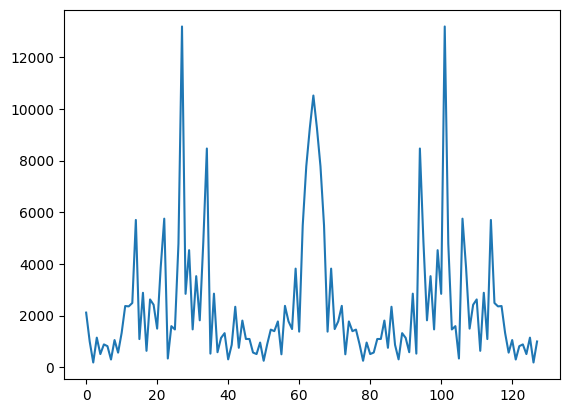

In [10]:
frequency_range = np.fft.fftshift(np.abs(fft(np.real(samples))))
plt.figure()
plt.plot(frequency_range)

In [7]:
#f.close()